# 2.3.5 결정트리(의사결정나무)모형(p.101)

### 관련모듈 로딩

In [1]:
import mglearn
import graphviz

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd

### 그래프에 한글표현을 위한 파라미터작업

In [2]:
## mtplotlib의 rcParams에서 특정 폰트를 글로벌 폰트패밀리로 등록

%matplotlib inline
# matplotlib패키지 전체를 mpl로, matplotlib.pyplot모듈을 plt라는 별칭으로 각각 로딩함
import matplotlib as mpl
import matplotlib.pyplot as plt # 그래프 그리는 모듈

mpl.rcParams['font.family'] = 'NanumGothic'
# - 이 노트북 파일에 한해 그래프에 나눔고딕으로 폰트를 기본으로 설정함

plt.rcParams['axes.unicode_minus'] = False 
# - 그래프 축눈금에 마이너스의 경우 출력이 제대로 되기위한 옵션

### 결정 트리에 대한 이해

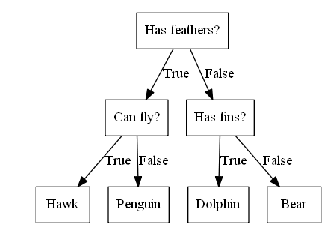

In [3]:
# 연속된 질문들을 통해서 동물들을 구분하는 결정트리 생성
mglearn.plots.plot_animal_tree()
# - mglearn 패키지-모들에 내장되어 있는 그림임

# - 가급적 적은 예/아니오 질문들을 통해서 문제를 해결하는 것이 중요함
# - 즉, 어떤 질문(피처:예측(독립)변수)가 데이터포인트를 분류하는 데 중요한 피처인지?
# - 어느 정도의 질문을 연속적으로 던져야 모든 데이터포인트의 분류가 이루어지는지? 

#### 결정 트리 만들기

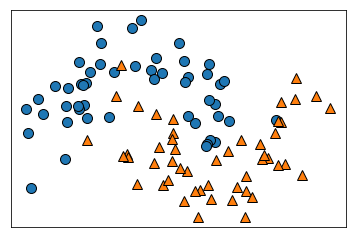

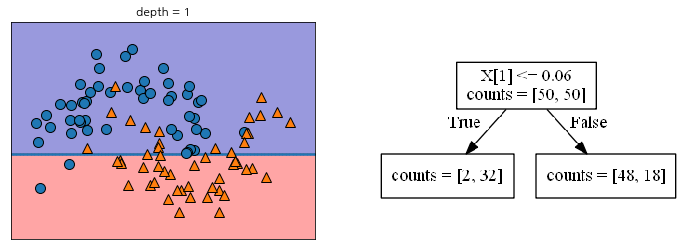

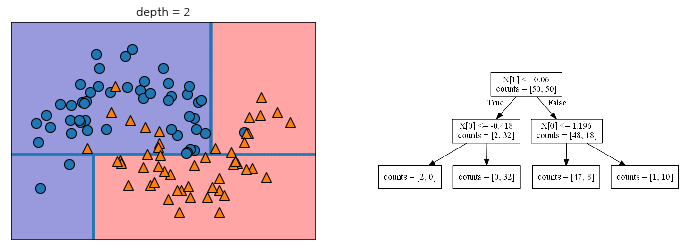

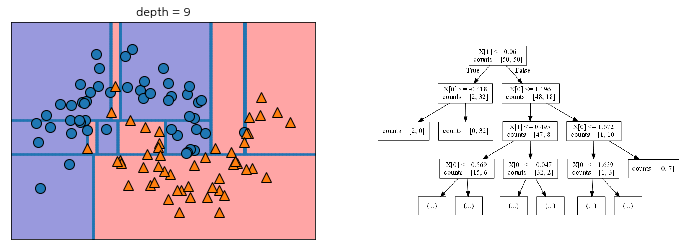

In [4]:
# 결정트리 생성과정에 대한 내장그림 출력
mglearn.plots.plot_tree_progressive()

# - depth = 1에서 [50, 50]이라는 표기는 클래스 0과 1에 속한 데이터포인트가 각각 50개이며, 
#   현재는 이 두개 클래스가 섞여서 분류가 하나도 안되었다는 것을 나타냄
# - 결정트리 알고리즘에서는 가장 뚜렷하게 분류되는 패턴을 보이는 피처와 임계치를 선정하는데,
#   depth = 1에서 X라는 훈련데이터셋 중에서 X[1]이라는 피처의 값이 0.06을 기준으로 했을 때가 
#   다른 피처&임계값에 비해서 가장 클래스0과 클래스1로 분할되는 패턴이 뚜렷하게 나타났다는 의미임

# - 피처 X[1]의 임계값이 0.06이하인인 경우에 클래스0에 속한 데이터포인트는 2개, 클래스1에 속한 데이터포인트는 32개로
#   이 규칙은 클래스1을 잘 분류해 내는 규칙임을 알 수 있음
# - 또한 피처 X[1]의 임계값이 0.06보다 큰 경우에는 
#   클래스0에 속한 데이터포인트는 48개, 클래스1에 속한 데이터포인트는 18개로
#   완벽한 분류가 된 것은 아니지만 클래스0이 상대적으로 많이 차지한 그룹으로 분류를 한 것임

# - depth = 1에서 피처 X[1]의 임계치가 0.06을 기준으로 최대한 클래스 0과 1로 분할되도록 하였지만,
#   [2, 32] 중에서 2개, [48, 18] 중에서 18개가 오분류된 것이므로 이를 더 세밀한 조건으로 분류하기 위해
#   depth = 2가 진행되는 것임

# - depth = 9에 가서야 모든 데이터포인트가 클래스0과 1로 분류되었는데, 
#   이 경우에는 결정나무의 깊이가 너무 깊어, 즉 모델 복잡도가 높아, 즉 여러 피처&임계치들의 결합으로 규칙이 만들어져서
#   실제 해당되는 데이터포인트의 갯수도 작고해서 모델이 과적합화가 높고, 일반화 가능성이 상대적으로 낮음

### 데이터셋 로딩

In [5]:
# 데이터 로딩: sklearn.datasets에 속한 메서드로 로딩
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
# cancer 데이터셋 객체유형와 키(key) 정보확인
print(type(cancer))
print(cancer.keys())
# - cancer객체는 사이킷런의 번치객체로 key()메서드로 다양한 세부요소항목을 조회할 수 있음

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
# 피처셋과 타깃셋 규모파악
print(cancer.data.shape)
print(cancer.target.shape)

(569, 30)
(569,)


### 클래스 분포현황 파악

In [8]:
# 반응(종속)변수 데이터셋의 기술통계
print('반응(종속)변수 데이터셋 클래스 유형:', np.unique(cancer.target))
print('반응(종속)변수 데이터셋 전체내용의 기술통계:', np.bincount(cancer.target))

print()

for k, v in  zip(np.unique(cancer.target), np.bincount(cancer.target)): 
    pct = v / sum(np.bincount(cancer.target)) 
    print("레이블: %d, 빈도수: %d, 비율: %0.3f" % (k, v, pct))
    # print("레이블: {0}, 빈도수: {1}, 비율: {2:0.3f}".format(k, v, pct))
    # print(f"레이블: {k}, 빈도수: {v}, 비율: {pct:0.3f}")

# - 타깃:반응(종속) 변수의 클래스별 분포비율을 확인한 만큼
#   훈련셋과 테스트셋을 분할할 때 각 데이터셋의 반응변수 분포비율도 이 비율이 유지되도록 해야함
# - 필요시 전체데이터셋의 타깃:반응(종속)변수 분포비율을 1:1로 만드는 
#   업샘플링/다운샘플링을 실시해 데이터분할을 하는 것도 또다른 모델링 방법임 

반응(종속)변수 데이터셋 클래스 유형: [0 1]
반응(종속)변수 데이터셋 전체내용의 기술통계: [212 357]

레이블: 0, 빈도수: 212, 비율: 0.373
레이블: 1, 빈도수: 357, 비율: 0.627


### 데이터 분할

In [9]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
# - 전체데이터셋의 타깃:반응(종속)변수의 클래스 분포비율이 
#   훈련셋과 테스트셋에서도 유지될 수 있도록 stratify = cancer.target이라는 옵션을 사용함 

### 훈련모델 피팅: 결정트리 깊이제한 없음

In [10]:
# 의사결정나무 분류기 객체생성: 결정트리 깊이제한 없음
tree = DecisionTreeClassifier(random_state = 0)
# - max_depth = 옵션을 설정하지 않아서 투리가 무한정 깊어지고 복잡해 질 수 있음
# - 훈련데이터의 모든 클래스 레이블을 완벽하게 분류할 수 있도록 결정트리가 매우 깊어질 가능성

# 생성된 의사결정나무 분류기객체에 훈련셋 피팅
tree.fit(X_train, y_train)

# 의사결정나무 분류성능평가
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))
# - 결정트리가 분류를 최대한 할 수 있도록 깊이제한을 두지 않아서 과대적합된 상태임
# - 테스트데이터등 새로운 데이터가 투입되었을 때 
#   정확도가 불안정하게 나와 일반화 모델로의 가능성이 낮음

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


### 훈련모델 피팅: 결정트리 깊이제한 있음

In [11]:
# 의사결정나무 분류기 객체생성: 결정트리 깊이제한을 설정함
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
# - max_depth = 옵션을 적절하게 설정하여 결정트리가 모든 클래스를 분류할 목적으로 
#   무한정 깊고 복잡하게 성장하기 전에 일정한 깊이에 도달하면 성장을 멈추게 함 

# 생성된 의사결정나무 분류기객체에 훈련셋 피팅
tree.fit(X_train, y_train)

# 의사결정나무 분류성능평가
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))
# - 결정트리의 성정을 일정한 깊이로 제한했을 경우 훈련셋에 대한 정확도는 다소 낮아지지만
#   테스트셋에 대한 성능은 향상되어 모델의 안전성이 확보됨

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


### 혼동표 작성

In [12]:
y_pred = tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

In [13]:
# 학습데이터 활용 의사결정모형 분석결과
print(cm)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1 score:", metrics.f1_score(y_test, y_pred, average='macro'))

[[49  4]
 [ 3 87]]
Accuracy: 0.951048951048951
Precision: 0.9491758241758241
Recall: 0.9455974842767296
F1 score: 0.947329650092081


In [14]:
# 결정트리 관련 시각화 모듈 일괄로딩
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

### 결정트리 시각화

In [15]:
### 의사결정나무 그림을 출력해주는 GraphViz라는 프로그램이 Jupyter Notebook에서 작동되도록 아래사항 실시
# http://www.graphviz.org/에 접속해 graphviz-2.38.msi 설치버전 다운로드후 PC에 직접설치
# PC환경변수(path)에 방금설치된 GraphViz의 C:\Program Files (x86)\Graphviz2.38라는 경로추가
# 아나콘다 프롬프트창이나 노트북파워셀 창에서 pip install graphviz pydotplut 구문실행
# 또는 conda install -c conda-forge graphviz pydotplus 구문실행

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


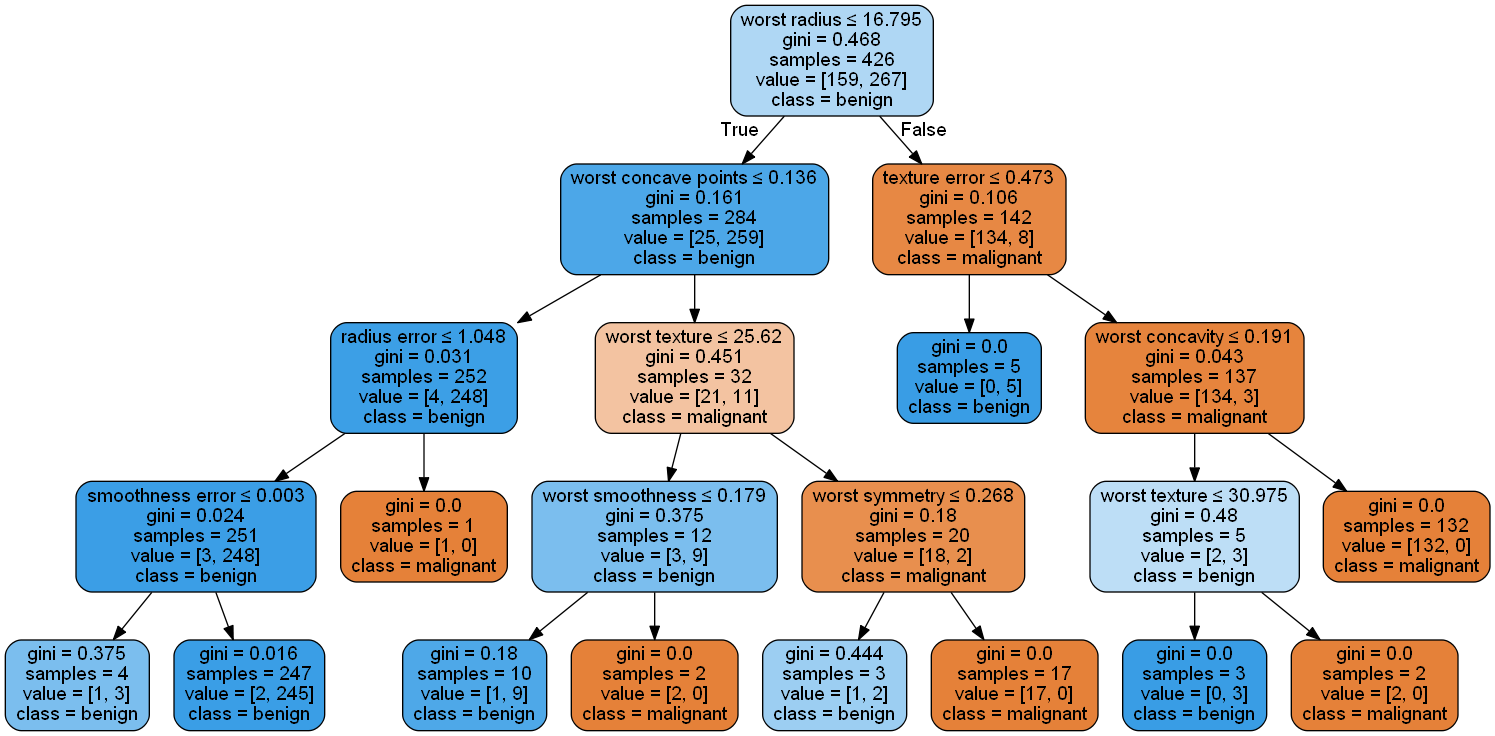

In [16]:
# 도출된 의사결정모형 규칙(Rule) 파악

# 훈련셋의 피처네임 출력
print(cancer.feature_names)

# 결정나무 시각화
export_graphviz(tree, # 결정트리 훈련데이터 피팅모델 입력
                out_file = "cancer_tree.dot", # 결정나무 그래프를 저장할 파일형식 지정 
                feature_names = cancer.feature_names, # 결정나무에 피처:예측(독립)변수명 입력
                class_names = cancer.target_names, # 결정나무에 타깃:반응(결과)변수의 클래스 레이블 입력
                filled = True, # 색상채우기
                rounded = True, # 둥근모서리사각형
                special_characters = True) # 특수기호 출력옵션

get_ipython().system('dot.exe -Tpng cancer_tree.dot > cancer_tree.png') 
# - 시스템에 저장된 .dot 그래프형식을 일반 그래프 파일형식으로 전환

Image("cancer_tree.png") 
# - 시스템에 저장된 결정나무 그래프파일을 로딩해 주피터노트북 결과셀에 출력해 줌 

### 결정트리 피처별 중요도

In [17]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

In [18]:
print("피처별 중요도:\n{}".format(tree.feature_importances_))
print()
print("피처 중요도 전체합: {}".format(round(sum(tree.feature_importances_), 3)))

피처별 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]

피처 중요도 전체합: 1.0


In [19]:
# 결정트리 피처중요도 플로팅 관련 사용자정의함수
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("피처 중요도")
    plt.ylabel("피처")
    plt.ylim(-1, n_features)

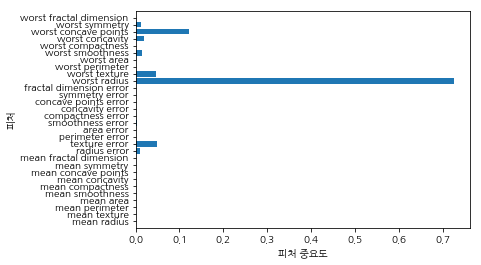

In [20]:
# 훈련셋 피팅모델을 이용한 피처별 중요도 시각화
plot_feature_importances_cancer(tree)

# End of Source